# INSTALLING REQUIRED PACKAGES

In [1]:
!pip install numpy
!pip install keras
!pip install pandas
!pip install seaborn
!pip install tensorflow
!pip install matplotlib
!pip install scikit-learn
!pip install -q -U keras-tuner


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# LOADING REQUIRED MODULES

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import datasets
from sklearn.model_selection import KFold
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

# CNN CLASS FOR IMPLEMENTING DIFFERENT CNN ARCHITECTURES

In [3]:
class CNN:
    def __init__(self):
        """
        Load the MNIST Dataset
        """
        (self.train_images, self.train_labels), (self.test_images, self.test_labels) = tf.keras.datasets.mnist.load_data(path="mnist_data")
        self.class_names = list(range(0,10))
    
    def get_data_statistics(self):
        """
        To get basic data statistics
        """
        print("Number of Original Training Samples -> {0}".format(len(self.train_images)))
        print("Number of Original Test Samples -> {0}".format(len(self.test_images)))
        print("Shape of Samples -> {0}".format(np.shape(self.test_images[0])))
        
    def view_data(self):
        """
        To view the MNIST Data
        """
        plt.figure(figsize=(20,20))
        for i in range(36):
            plt.subplot(6,6,i+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(self.train_images[i])
            plt.xlabel(self.class_names[self.train_labels[i]])
        plt.show()
    
    def clean_data(self):
        """
        To perform data cleaning -
        1. Normalize the pixel values
        2. Reshape the image to 28 * 28 * 1
        3. One Hot Encode the train and test labels
        """
        self.train_images, self.test_images = self.train_images / 255.0, self.test_images / 255.0
        self.train_images = self.train_images.reshape((self.train_images.shape[0], 28, 28, 1))
        self.test_images = self.test_images.reshape((self.test_images.shape[0], 28, 28, 1))
        self.train_labels = to_categorical(self.train_labels)
        self.test_labels = to_categorical(self.test_labels)
        
    def get_train_validation_set(self):
        """
        To split train data into training and validation set 
        """
        self.train_images1, self.val_images, self.train_labels1, self.val_labels = train_test_split(self.train_images, self.train_labels, test_size=0.20, random_state=56)    
        print("Number of Original Training Samples -> {0}".format(len(self.train_images1)))
        print("Number of Original Validation Samples -> {0}".format(len(self.val_images)))
    
    def initialize_cnn_lenet5(self):
        """
        Initialize LeNet 5 CNN Architecture
        """
        self.model_name = "cnn_lenet5.h5"
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(6, kernel_size=5, strides=1, activation='tanh', padding='same', input_shape=(28, 28, 1)))
        self.model.add(layers.AveragePooling2D())
        self.model.add(layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'))
        self.model.add(layers.AveragePooling2D())
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(120, activation='tanh'))
        self.model.add(layers.Dense(84, activation='tanh'))
        self.model.add(layers.Dense(10, activation='tanh'))
        self.model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
        
    def initialize_cnn_model1(self):
        """
        Initialize Model 1 CNN Architecture
        """
        self.model_name = "cnn_model1.h5"
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
        self.model.add(layers.Dense(10))
        self.model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    def initialize_cnn_model2(self):
        """
        Initialize Model 2 CNN Architecture
        """
        self.model_name = "cnn_model2.h5"
        self.model = models.Sequential()
        self.model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
        self.model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
        self.model.add(layers.MaxPooling2D((2, 2)))
        self.model.add(layers.Flatten())
        self.model.add(layers.Dense(100, activation='relu', kernel_initializer='he_uniform'))
        self.model.add(layers.Dense(10))
        self.model.compile(optimizer='adam', loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
    
    def get_model_summary(self):
        """
        Get an overview of model architecture
        """
        print(self.model.summary())
    
    def train_cnn_model(self):
        """
        Train the corresponding CNN model
        """
        self.model_history = self.model.fit(self.train_images1, self.train_labels1, epochs=10, validation_data=(self.val_images, self.val_labels), use_multiprocessing=True)
    
    def save_cnn_model(self):
        """
        Save the corresponding CNN model
        """
        self.model.save(self.model_name)
        print("Saved Model -> {0}".format(self.model_name))
    
    def evaluate_cnn_model(self):
        """
        Evaluate the corresponding CNN model
        """
        plt.plot(self.model_history.history['accuracy'], label='accuracy')
        plt.plot(self.model_history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('No of Epochs')
        plt.ylabel('Accuracy')
        plt.ylim([0.8, 1])
        plt.legend(loc='lower right')
    
    def get_confusion_matrix(self):
        """
        Get the confusion matrix
        """
        self.test_loss, self.test_accuracy = self.model.evaluate(self.test_images, self.test_labels, verbose=2)
        print("Test Loss -> {0} Test Accuracy -> {1}".format(self.test_loss,self.test_accuracy))
        self.test_predictions = self.model.predict(self.test_images)
        self.predict_test_labels = tf.argmax(self.test_predictions, axis = 1)
        self.true_test_labels = tf.argmax(self.test_labels, axis = 1)
        self.confusion_matrix = tf.math.confusion_matrix(self.predict_test_labels, self.true_test_labels, num_classes=10)
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.confusion_matrix, xticklabels=list(range(0,10)), yticklabels=list(range(0,10)), annot=True, fmt='g')
        plt.xlabel('Predictions')
        plt.ylabel('Labels')
        plt.show()
    
    def get_precision_recall_f1score(self):
        """
        Get precision, recall, f1 score and support of the trained CNN model
        """
        self.precision, self.recall, self.fscore, self.support = score(self.true_test_labels, self.predict_test_labels)
        self.score_dict = {"Class":list(range(0,10)), "Precision":self.precision, "Recall":self.recall, "Fscore":self.fscore}
        self.score_df = pd.DataFrame(self.score_dict)
        print(self.score_df)

## CREATE A CNN CLASS OBJECT

In [4]:
ob = CNN()

## GET INFO OF DATA

In [5]:
ob.get_data_statistics()

Number of Original Training Samples -> 60000
Number of Original Test Samples -> 10000
Shape of Samples -> (28, 28)


## VIEW DATA

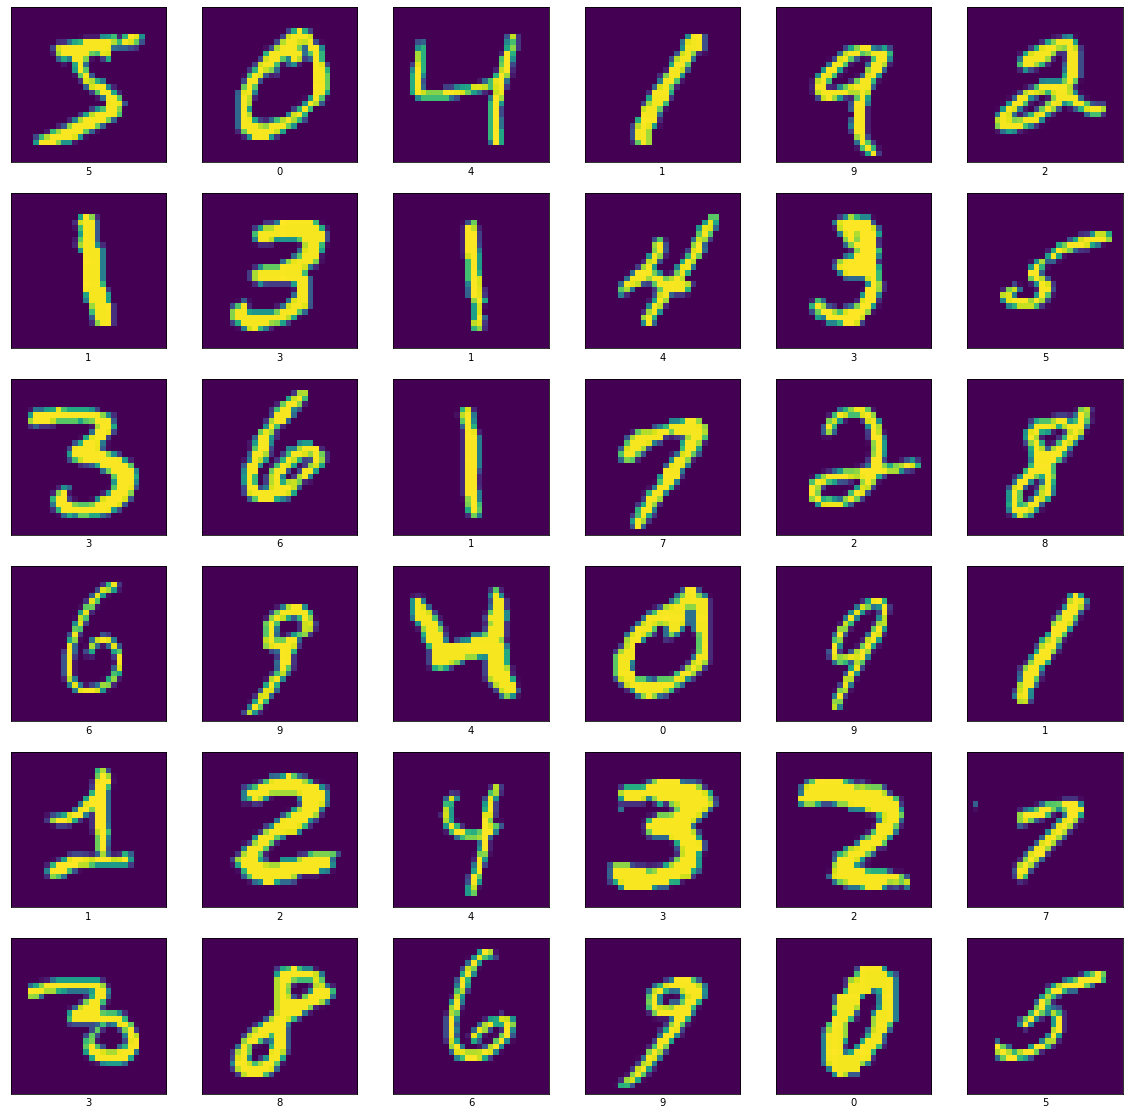

In [6]:
ob.view_data()

## CLEAN DATA

In [7]:
ob.clean_data()

## SPLIT TRAIN DATA INTO TRAIN AND VALIDATION SET

In [8]:
ob.get_train_validation_set()

Number of Original Training Samples -> 48000
Number of Original Validation Samples -> 12000


# IMPLEMENT LENET 5 CNN ARCHITECTURE 

## INITIALIZE LENET 5 CNN MODEL

In [9]:
ob.initialize_cnn_lenet5()

## PRINT MODEL NAME

In [10]:
ob.model_name

'cnn_lenet5.h5'

## PRINT MODEL ARCHITECTURE

In [11]:
ob.get_model_summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (AverageP  (None, 14, 14, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

## TRAIN LENET 5 CNN MODEL

In [12]:
ob.train_cnn_model()

Epoch 1/10
1500/1500 [==============================] - 19s 12ms/step - loss: 0.9624 - accuracy: 0.9179 - val_loss: 0.8838 - val_accuracy: 0.9517
Epoch 2/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8565 - accuracy: 0.9670 - val_loss: 0.8541 - val_accuracy: 0.9672
Epoch 3/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8372 - accuracy: 0.9774 - val_loss: 0.8439 - val_accuracy: 0.9722
Epoch 4/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8284 - accuracy: 0.9821 - val_loss: 0.8383 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8235 - accuracy: 0.9841 - val_loss: 0.8288 - val_accuracy: 0.9808
Epoch 6/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8198 - accuracy: 0.9865 - val_loss: 0.8264 - val_accuracy: 0.9810
Epoch 7/10
1500/1500 [==============================] - 17s 11ms/step - loss: 0.8163 - accuracy: 0.9887 - val_loss: 0.8298 -

## SAVE LENET 5 CNN MODEL

In [13]:
ob.save_cnn_model()

Saved Model -> cnn_lenet5.h5


## EVALUATE LENET 5 CNN MODEL

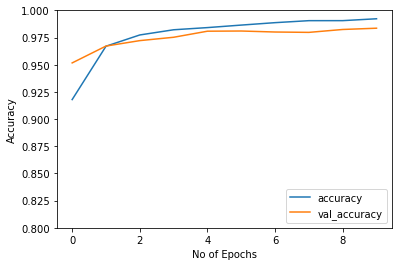

In [14]:
ob.evaluate_cnn_model()

## GET CONFUSION MATRIX

313/313 - 2s - loss: 0.8209 - accuracy: 0.9854 - 2s/epoch - 6ms/step
Test Loss -> 0.820904016494751 Test Accuracy -> 0.9854000210762024
313/313 [==============================] - 2s 5ms/step


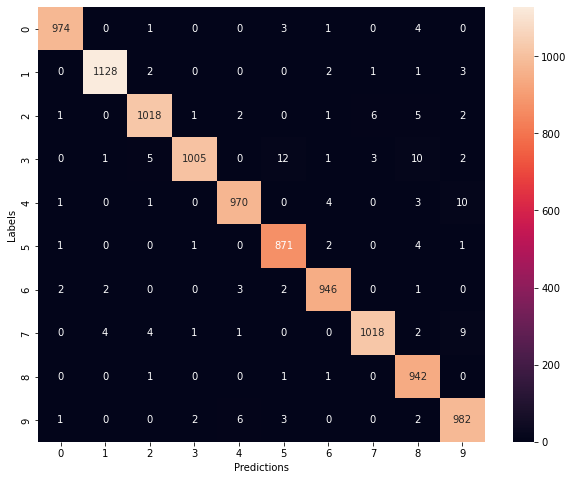

In [15]:
ob.get_confusion_matrix()

## GET PRECISION, RECALL AND F1 SCORE

In [16]:
ob.get_precision_recall_f1score()

   Class  Precision    Recall    Fscore
0      0   0.990844  0.993878  0.992359
1      1   0.992084  0.993833  0.992958
2      2   0.982625  0.986434  0.984526
3      3   0.967276  0.995050  0.980966
4      4   0.980789  0.987780  0.984272
5      5   0.989773  0.976457  0.983070
6      6   0.989540  0.987474  0.988506
7      7   0.979788  0.990272  0.985002
8      8   0.996825  0.967146  0.981761
9      9   0.985944  0.973241  0.979551


# IMPLEMENT MODEL 1 CNN ARCHITECTURE

## INITIALIZE MODEL 1 CNN MODEL

In [17]:
ob.initialize_cnn_model1()

## PRINT MODEL NAME

In [18]:
ob.model_name

'cnn_model1.h5'

## PRINT MODEL ARCHITECTURE

In [19]:
ob.get_model_summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 100)               540900    
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 542,230
Trainable params: 542,230
Non-trainable params: 0
________________________________________________

## TRAIN MODEL1  CNN MODEL

In [20]:
ob.train_cnn_model()

Epoch 1/10
1500/1500 [==============================] - 25s 16ms/step - loss: 0.1528 - accuracy: 0.9544 - val_loss: 0.0713 - val_accuracy: 0.9782
Epoch 2/10
1500/1500 [==============================] - 22s 14ms/step - loss: 0.0503 - accuracy: 0.9850 - val_loss: 0.0635 - val_accuracy: 0.9792
Epoch 3/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0293 - accuracy: 0.9905 - val_loss: 0.0582 - val_accuracy: 0.9813
Epoch 4/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0208 - accuracy: 0.9935 - val_loss: 0.0585 - val_accuracy: 0.9831
Epoch 5/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0127 - accuracy: 0.9959 - val_loss: 0.0609 - val_accuracy: 0.9846
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0109 - accuracy: 0.9966 - val_loss: 0.0634 - val_accuracy: 0.9838
Epoch 7/10
1500/1500 [==============================] - 21s 14ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.0541 -

## SAVE MODEL 1 CNN MODEL

In [21]:
ob.save_cnn_model()

Saved Model -> cnn_model1.h5


## EVALUATE MODEL1 CNN MODEL

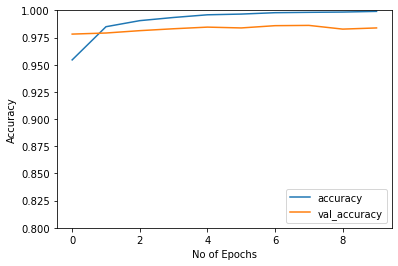

In [22]:
ob.evaluate_cnn_model()

## GET CONFUSION MATRIX

313/313 - 2s - loss: 0.0612 - accuracy: 0.9855 - 2s/epoch - 5ms/step
Test Loss -> 0.06117556616663933 Test Accuracy -> 0.9854999780654907
313/313 [==============================] - 1s 4ms/step


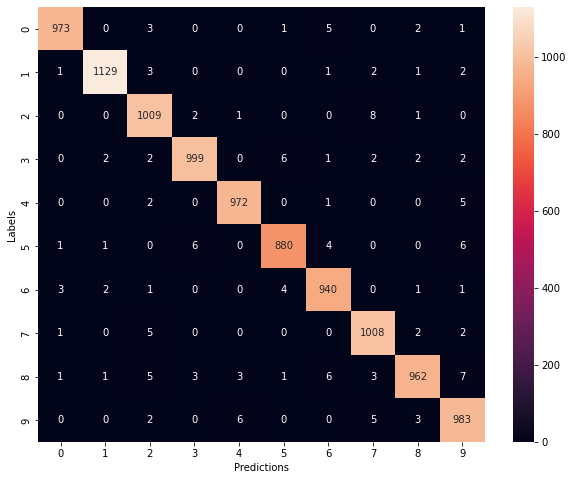

In [23]:
ob.get_confusion_matrix()

## GET PRECISION, RECALL AND F1 SCORE

In [24]:
ob.get_precision_recall_f1score()

   Class  Precision    Recall    Fscore
0      0   0.987817  0.992857  0.990331
1      1   0.991220  0.994714  0.992964
2      2   0.988247  0.977713  0.982952
3      3   0.983268  0.989109  0.986180
4      4   0.991837  0.989817  0.990826
5      5   0.979955  0.986547  0.983240
6      6   0.987395  0.981211  0.984293
7      7   0.990177  0.980545  0.985337
8      8   0.969758  0.987680  0.978637
9      9   0.983984  0.974232  0.979084


# IMPLEMENT MODEL 2 CNN ARCHITECTURE

## INITIALIZE MODEL 2 CNN MODEL

In [25]:
ob.initialize_cnn_model2()

## PRINT MODEL NAME

In [26]:
ob.model_name

'cnn_model2.h5'

## PRINT MODEL ARCHITECTURE

In [27]:
ob.get_model_summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

## TRAIN MODEL2  CNN MODEL

In [28]:
ob.train_cnn_model()

Epoch 1/10
1500/1500 [==============================] - 35s 23ms/step - loss: 0.1210 - accuracy: 0.9628 - val_loss: 0.0697 - val_accuracy: 0.9793
Epoch 2/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0418 - accuracy: 0.9868 - val_loss: 0.0459 - val_accuracy: 0.9856
Epoch 3/10
1500/1500 [==============================] - 34s 23ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0364 - val_accuracy: 0.9896
Epoch 4/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0210 - accuracy: 0.9934 - val_loss: 0.0520 - val_accuracy: 0.9850
Epoch 5/10
1500/1500 [==============================] - 43s 29ms/step - loss: 0.0184 - accuracy: 0.9937 - val_loss: 0.0378 - val_accuracy: 0.9885
Epoch 6/10
1500/1500 [==============================] - 42s 28ms/step - loss: 0.0119 - accuracy: 0.9964 - val_loss: 0.0415 - val_accuracy: 0.9905
Epoch 7/10
1500/1500 [==============================] - 43s 28ms/step - loss: 0.0123 - accuracy: 0.9960 - val_loss: 0.0371 -

## SAVE MODEL 2 CNN MODEL

In [29]:
ob.save_cnn_model()

Saved Model -> cnn_model2.h5


## EVALUATE MODEL2 CNN MODEL

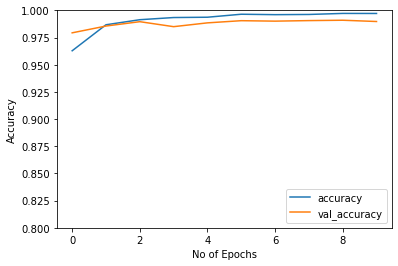

In [30]:
ob.evaluate_cnn_model()

## GET CONFUSION MATRIX

313/313 - 3s - loss: 0.0456 - accuracy: 0.9905 - 3s/epoch - 11ms/step
Test Loss -> 0.04564450681209564 Test Accuracy -> 0.9904999732971191
313/313 [==============================] - 3s 11ms/step


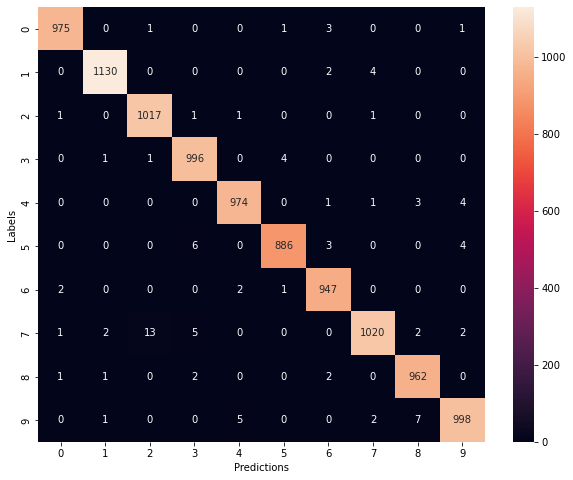

In [31]:
ob.get_confusion_matrix()

## GET PRECISION, RECALL AND F1 SCORE

In [32]:
ob.get_precision_recall_f1score()

   Class  Precision    Recall    Fscore
0      0   0.993884  0.994898  0.994391
1      1   0.994718  0.995595  0.995156
2      2   0.996082  0.985465  0.990745
3      3   0.994012  0.986139  0.990060
4      4   0.990844  0.991853  0.991349
5      5   0.985539  0.993274  0.989391
6      6   0.994748  0.988518  0.991623
7      7   0.976077  0.992218  0.984081
8      8   0.993802  0.987680  0.990731
9      9   0.985192  0.989098  0.987141
